In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/df_vinho.csv')
df.head()

,acidez fixa,acidez volátil,ácido cítrico,açúcar residual,cloretos,dióxido de enxofre livre,dióxido de enxofre total,densidade,pH,sulfatos,álcool,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,mediano
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,mediano
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,mediano
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,mediano
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,mediano


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   acidez fixa                1359 non-null   float64
 1   acidez volátil             1359 non-null   float64
 2   ácido cítrico              1359 non-null   float64
 3   açúcar residual            1359 non-null   float64
 4   cloretos                   1359 non-null   float64
 5   dióxido de enxofre livre   1359 non-null   float64
 6   dióxido de enxofre total   1359 non-null   float64
 7   densidade                  1359 non-null   float64
 8   pH                         1359 non-null   float64
 9   sulfatos                   1359 non-null   float64
 10  álcool                     1359 non-null   float64
 11  qualidade                  1359 non-null   object 
dtypes: float64(11), object(1)
memory usage: 127.5+ KB


Como os dados já estão em formato float e o modelo que vou usar, `RandomForestClassifer`, pode receber a variável target em formato string/object, não irei codificar nenhuma coluna.

In [4]:
x = df.drop('qualidade', axis=1)
y = df['qualidade']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Dividindo a parte de teste

x, x_test, y, y_test = train_test_split(x, y, test_size=0.15,
                                        stratify=y,
                                        random_state=0)

# Parte de validação e treino

x_train, x_val, y_train, y_val = train_test_split(x, y,
                                                  stratify=y,
                                                  random_state=0)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

         bom       0.67      0.41      0.51        39
     mediano       0.86      0.97      0.91       236
        ruim       0.00      0.00      0.00        14

    accuracy                           0.84       289
   macro avg       0.51      0.46      0.47       289
weighted avg       0.79      0.84      0.81       289



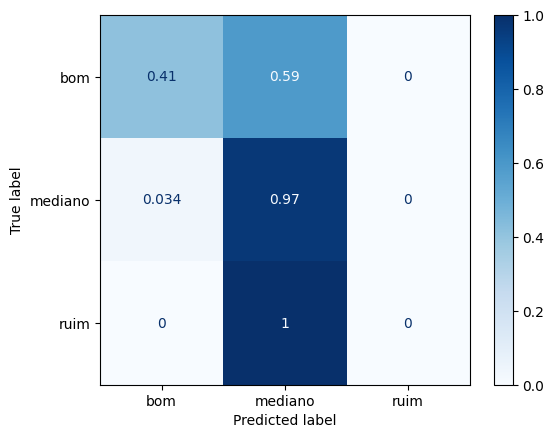

In [8]:
# Iniciando o modelo

rfc = RandomForestClassifier(random_state=0,
                             max_depth=10)

# Treinando o modelo

rfc.fit(x_train, y_train)

# Previsão

y_pred = rfc.predict(x_val)

# Avaliando

print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

In [9]:
df['qualidade'].value_counts(normalize=True)

qualidade
mediano    0.818249
bom        0.135394
ruim       0.046358
Name: proportion, dtype: float64

Como a distribuição do target está bem desbalanceada, será feito o balanceamento dos dados com oversample

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
oversample = SMOTE(random_state=0)

x_balance, y_balance = oversample.fit_resample(x_train, y_train)
y_balance.value_counts(normalize=True)

qualidade
mediano    0.333333
bom        0.333333
ruim       0.333333
Name: proportion, dtype: float64

              precision    recall  f1-score   support

         bom       0.45      0.74      0.56        39
     mediano       0.92      0.75      0.83       236
        ruim       0.23      0.50      0.31        14

    accuracy                           0.74       289
   macro avg       0.53      0.67      0.57       289
weighted avg       0.82      0.74      0.77       289



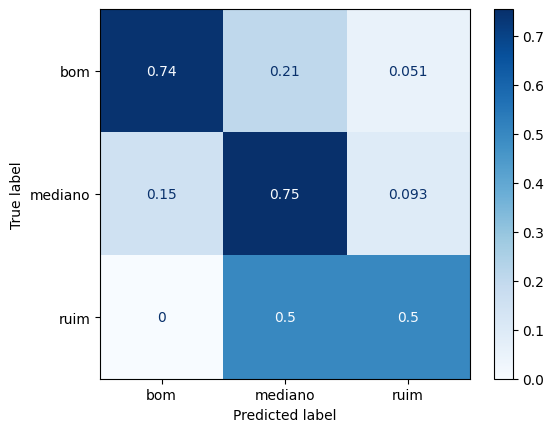

In [20]:
# Treinando o modelo com os dados balanceaDOS 

rfc.fit(x_balance, y_balance)

# Previsão 

y_pred = rfc.predict(x_val)

# Avaliando

print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues')

Iniciando a __validação cruzada__

In [14]:
from imblearn.pipeline import Pipeline as imbpipeline

In [15]:
pipeline = imbpipeline([
    ('oversample', SMOTE(random_state=0)),
    ('RandomForestClassifier', rfc)
])

In [16]:
from sklearn.model_selection import cross_validate, cross_val_score, StratifiedKFold

In [22]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

cv_results = cross_validate(pipeline, x, y, cv=skf, scoring='accuracy')

cv_results['test_score']

array([0.73593074, 0.75757576, 0.72294372, 0.76190476, 0.74458874])

In [23]:
# Intervalo de Confiança 

mean = cv_results['test_score'].mean()
std = cv_results['test_score'].std()

print(f'Intervalo de confiança: [{mean-2*std}, {min(mean+2*std, 1)}]')

Intervalo de confiança: [0.7161356247183464, 0.7730418644591428]


# Testando o modelo com os dados de teste

              precision    recall  f1-score   support

         bom       0.47      0.61      0.53        28
     mediano       0.91      0.83      0.87       167
        ruim       0.38      0.67      0.48         9

    accuracy                           0.79       204
   macro avg       0.59      0.70      0.63       204
weighted avg       0.82      0.79      0.80       204



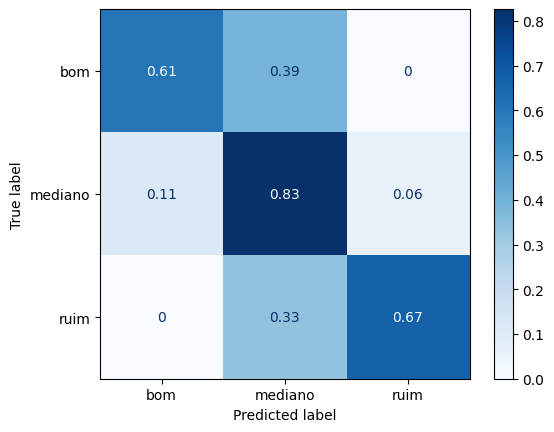

In [24]:
y_pred = rfc.predict(x_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Blues')